# GrandMaster Grapher

## [Github Repository Link](https://github.com/SahajG009/Grandmaster-Grapher)


## Step 1: Project Overview

- Objective: Create a data science project that scrapes chess player ratings from a website, saves the data in a CSV file, and visualizes the ratings using Matplotlib.- 
Tools and Libraries: Python, Requests, BeautifulSoup, CSV,pandas  and Matplotli

### Making a Virtual Environment
1. python -m venv gmaster - Makes a Virtual Environment
2. .\gmaster\Scripts\activate - Activates the Virtual Environment
3. pip install ipykernel - Installs ipykernel
4. python -m ipykernel install --name=gmaster - Links the Kernel to the Virtual Environment

## Kernel - gmaster

## Step 2: Import Libraries
Import the necessary Python libraries:

In [2]:
pip install requests

     ---------------------------------------- 62.6/62.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 99.9/99.9 kB 640.2 kB/s eta 0:00:00
     ---------------------------------------- 61.6/61.6 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 104.6/104.6 kB 754.7 kB/s eta 0:00:00
     ------------------------------------ 162.5/162.5 kB 810.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install beautifulsoup4

     -------------------------------------- 147.9/147.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 983.3 kB/s eta 0:00:00
     -------------------------------------- 187.6/187.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 15.8/15.8 MB 652.8 kB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 711.1 kB/s eta 0:00:00
     ------------------------------------ 103.1/103.1 kB 743.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
pip install pandas

     -------------------------------------- 11.6/11.6 MB 698.9 kB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
     ------------------------------------ 346.6/346.6 kB 430.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import requests

In [12]:
from bs4 import BeautifulSoup

In [13]:
import csv

In [14]:
import matplotlib.pyplot as plt

In [38]:
import pandas as pd

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23528\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Step 3: Scraping Data

- Scrape live world rankings and performance metrics of the top 10 chess players from 2700chess.com

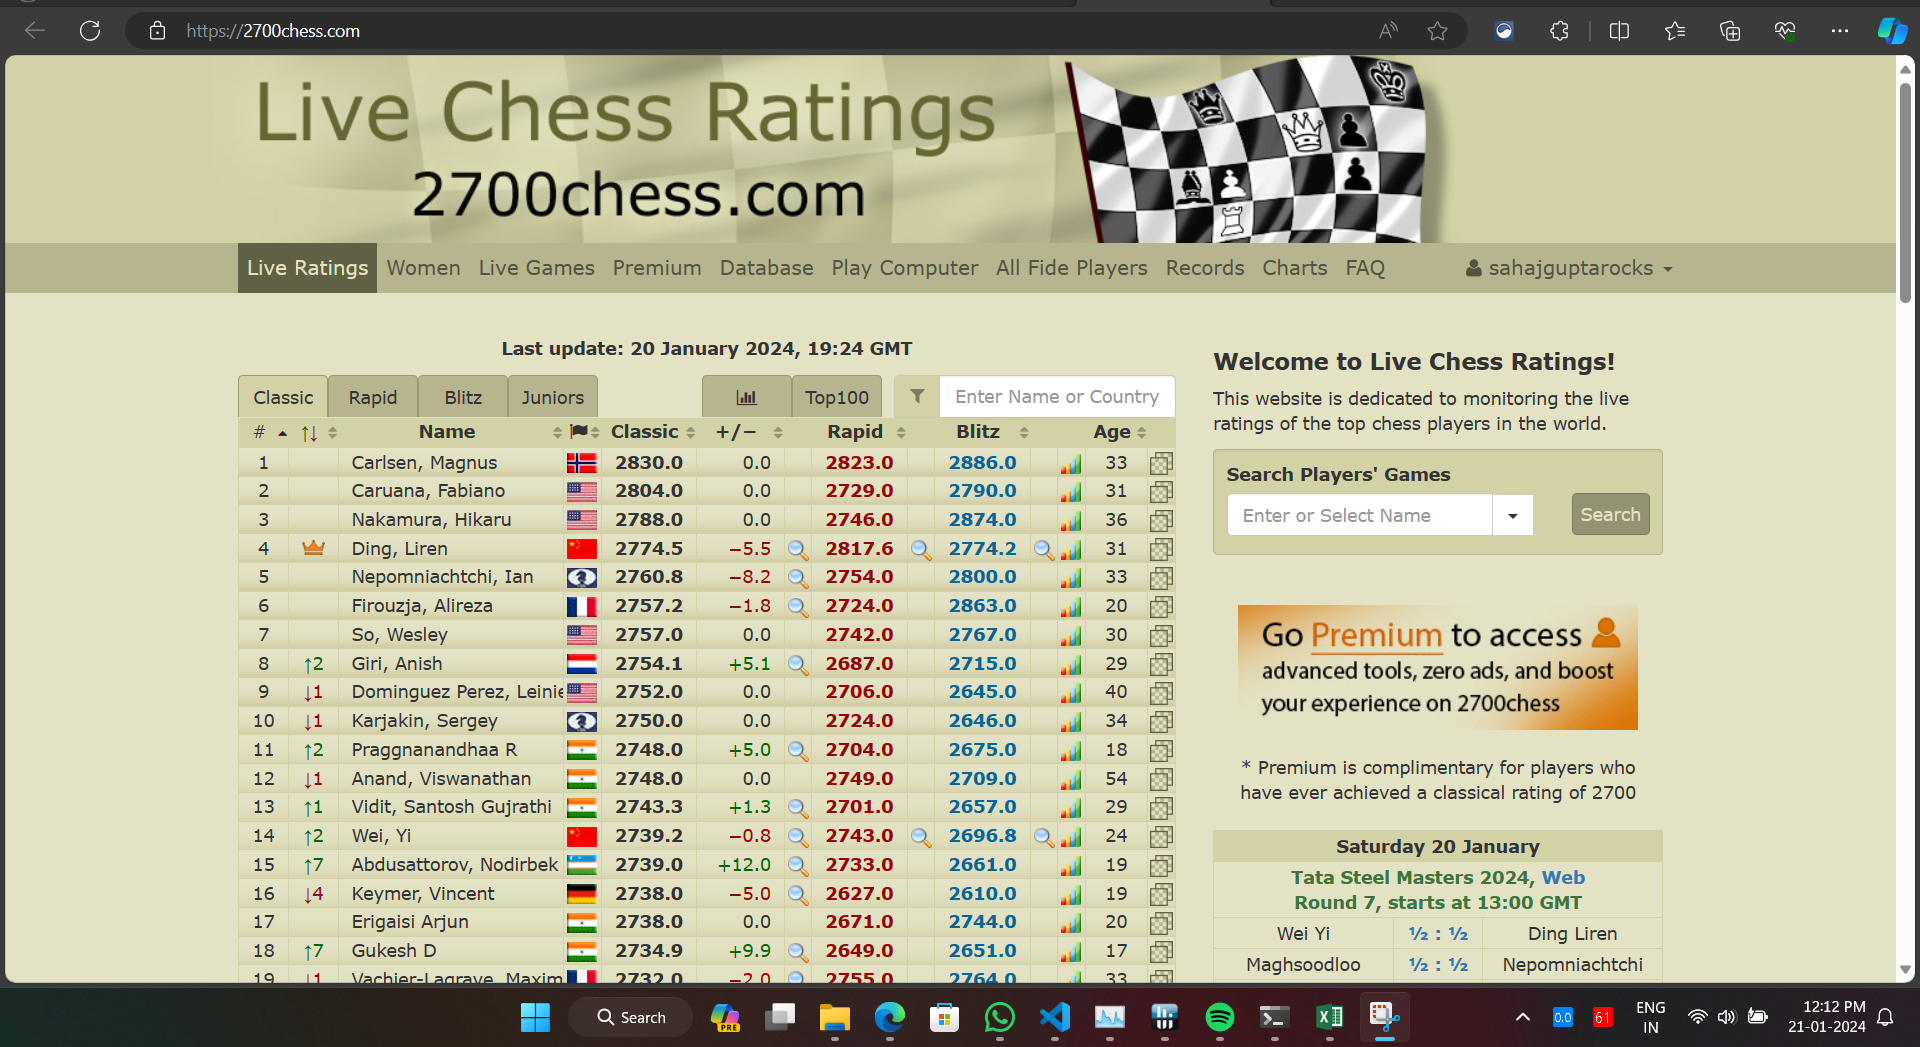

In [46]:
from IPython.display import Image, display
# Specify the path to the image file or use the filename if it's in the same directory.
image_path = 'E:\Grandmaster Grapher/ratings.png'
display(Image(filename=image_path))

# Step 4: Extracting Data

In [30]:
import requests
from bs4 import BeautifulSoup

def scrape_chess_ratings():
    url = "https://2700chess.com/"  

    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        player_rows = soup.find_all("tr", class_=["leaders", "top_ten", "all_lines"])[:10]

        data = []

        for row in player_rows:
            ranking = row.find("td", class_="pos").text.strip()
            wc_status = "Yes" if "top_ten" in row["class"] else "No"
            name = row.find("td", class_="name").a.text.strip()
            classical_rating = int(row.find("td", class_="rating").strong.text.strip())
            rapid_rating = int(row.find("td", class_="rapid-rating").text.strip())
            blitz_rating = int(row.find("td", class_="blitz-rating").text.strip())
            birth_year = int(row.find("td", class_="birth").span.text.strip())

            # Calculate age based on the current year (2024)
            current_year = 2024
            age = current_year - birth_year

            player_data = {
                "Ranking": ranking,
                "WC": wc_status,
                "Name": name,
                "Classical Rating": classical_rating,
                "Rapid Rating": rapid_rating,
                "Blitz Rating": blitz_rating,
                "Age": age
            }

            data.append(player_data)

        return data

    else:
        print("Failed to retrieve data. Status code:", response.status_code)
        return None

# Step 5: Saving to CSV File

- Saves data in CSV File format
- Headers
    1. Ranking
    2. WC {World Champion}
    3. Name
    4. Classical 
    5. Rapid
    6. Blitz
    7. Age
- Ratings are subject to change. {Rating as respect to 21 January 2024} 

In [31]:
def save_to_csv(data, filename="chess_ratings.csv"):
    with open(filename, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Ranking","WC","Name", "Classical Rating", "Rapid Rating", "Blitz Rating","Age"])
        writer.writerows(data)

In [43]:
def read_and_display_csv(filename="chess_ratings.csv"):
    with open(filename, mode="r", encoding="utf-8") as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)
read_and_display_csv()

['Ranking', 'WC', 'Name', 'Classic', 'Rapid', 'Blitz', 'Age']
['1', '', 'Carlsen, Magnus', '2830', '2823', '2886', '33']
['2', '', 'Caruana, Fabiano', '2804', '2729', '2790', '31']
['3', '', 'Nakamura, Hikaru', '2788', '2746', '2874', '36']
['4', 'Champion', 'Ding, Liren', '2774.5', '2817.6', '2774.2', '31']
['5', '', 'Nepomniachtchi, Ian', '2760.8', '2754', '2800', '33']
['6', '', 'Firouzja, Alireza', '2757.2', '2724', '2863', '20']
['7', '', 'So, Wesley', '2757', '2742', '2767', '30']
['8', '', 'Giri, Anish', '2754.1', '2687', '2715', '29']
['9', '', 'Dominguez Perez, Leinier', '2752', '2706', '2645', '40']
['10', '', 'Karjakin, Sergey', '2750', '2724', '2646', '34']


# Step 6: Visualizing Data

The Graph shows the following data
1. Ranking: Current World Ranking
2. Name: Player's Name
3. Classical Rating: Player's rating in Classical Time Control
4. Rapid Rating: Player's rating in Rapid Time Control
5. Blitz Rating: Player's rating in Blitz Time Control

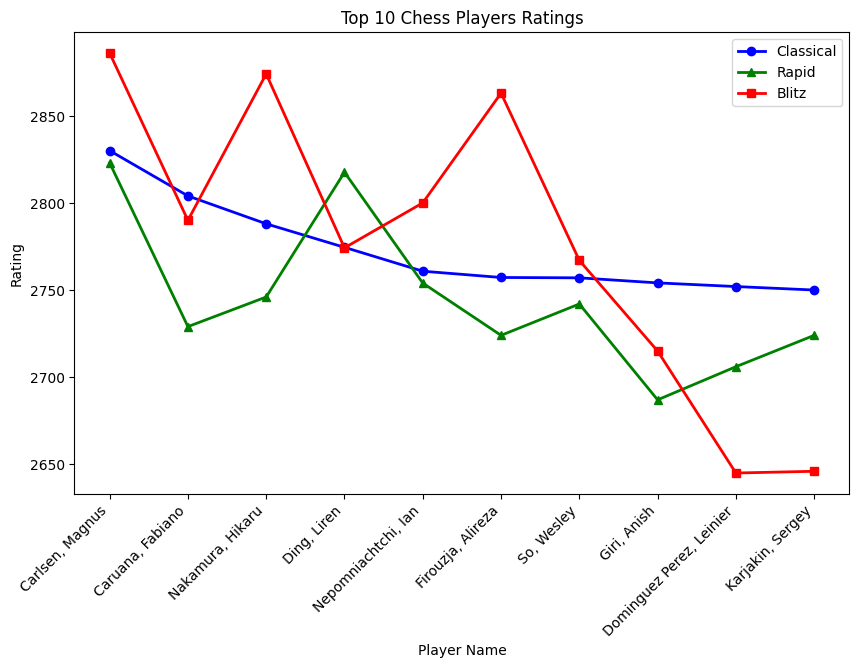

In [42]:
# Load data from CSV file
df = pd.read_csv("chess_ratings.csv")

# Extracting data
names = df["Name"]
ages = df["Age"]
classical_ratings = df["Classic"]
rapid_ratings = df["Rapid"]
blitz_ratings = df["Blitz"]

# Plotting
plt.figure(figsize=(10, 6))

# Line chart for Classical Ratings
plt.plot(names, classical_ratings, label='Classical', marker='o', color='blue', linestyle='-', linewidth=2)

# Line chart for Rapid Ratings
plt.plot(names, rapid_ratings, label='Rapid', marker='^', color='green', linestyle='-', linewidth=2)

# Line chart for Blitz Ratings
plt.plot(names, blitz_ratings, label='Blitz', marker='s', color='red', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Player Name')
plt.ylabel('Rating')
plt.title('Top 10 Chess Players Ratings')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

# Step 7: Conclusion
Grandmaster Grapher, powered by web scraping and key Python libraries such as Pandas, Matplotlib, and CSV, elegantly visualizes real-time data from 2700chess.com.
With a focus on the top 10 chess players, this project not only offers a dynamic snapshot of rankings and ratings but also provides a solid foundation for further data exploration and analysis in the world of elite chess.

# Step 8: Insights


## Performance Trends
The visualization provided by Grandmaster Grapher reveals insightful performance trends among the top 10 chess players in classical, rapid, and blitz time controls. Understanding these trends offers valuable insights into player strengths and preferences across different game formats.

## Player Comparisons
The tool facilitates easy comparisons between players, enabling enthusiasts and analysts to identify disparities and similarities in their ratings and rankings. This comparative analysis contributes to a better understanding of individual player dynamics.

## Age vs. Rating Correlation
Connecting player age with their respective ratings unveils potential correlations between age and performance. This insight could spark further analysis into the dynamics of chess players' careers and the impact of age on their playinf the world of elite chess.
s.

# Step 9: Future Prospects

## Historical Analysis
Extend the project to include historical data, enabling a longitudinal analysis of players' progress over time. This could unveil patterns and contribute to discussions on the evolution of chess strategies.

## Interactive Features
Incorporate interactive elements into the visualization, allowing users to hover over data points for additional details or dynamically filter and explore specific players or time controls. This enhances user engagement and exploration.

## Machine Learning Integration
Explore the integration of machine learning models to predict future player ratings based on historical data. This could provide intriguing forecasts and contribute to discussions on the future of chess and player performance.

## Expanded Data Sources
Consider expanding data sources to include additional chess platforms or tournament results, providing a more comprehensive view of players' performances and rankings.

## User Customization
Implement features that allow users to customize the visualization based on their preferences. This could include selecting specific players, time periods, or rating categories, enhancing the user experience.

By pursuing these future prospects, Grandmaster Grapher can evolve into a versatile tool for chess enthusiasts, researchers, and analysts, offering deeper insights and a richer understanding of the world of elite chess.
